# Premier League - Análisis Histórico (1992-2025)

Este notebook contiene el análisis completo de datos históricos de la Premier League desde su creación.

## 1. Importar librerías y configuración

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ Librerías importadas")

✓ Librerías importadas


## 2. Ejecutar el scraper robusto

In [2]:
# Ejecutar el scraper
#%run scraper_robusto.py

## 3. Cargar y verificar datos

In [3]:
# Cargar datos completos
df = pd.read_csv('premier_league_COMPLETO_football_data.csv')

print(f"📊 Dataset cargado")
print(f"   Registros: {len(df):,}")
print(f"   Columnas: {len(df.columns)}")
print(f"   Temporadas: {df['Temporada'].nunique()}")
print(f"   Equipos únicos: {df['Equipo'].nunique()}")

# Mostrar primeras filas
df.head(10)

📊 Dataset cargado
   Registros: 644
   Columnas: 11
   Temporadas: 32
   Equipos únicos: 51


,Temporada,Pos,Equipo,PJ,G,E,P,Pts,GF,GC,Dif
0,1993-94,1,Man United,42,27,11,4,92,80,38,42
1,1993-94,2,Blackburn,42,25,9,8,84,63,36,27
2,1993-94,3,Newcastle,42,23,8,11,77,82,41,41
3,1993-94,4,Arsenal,42,18,17,7,71,53,28,25
4,1993-94,5,Leeds,42,18,16,8,70,65,39,26
5,1993-94,6,Wimbledon,42,18,11,13,65,56,53,3
6,1993-94,7,Sheffield Weds,42,16,16,10,64,76,54,22
7,1993-94,8,Liverpool,42,17,9,16,60,59,55,4
8,1993-94,9,QPR,42,16,12,14,60,62,61,1
9,1993-94,10,Aston Villa,42,15,12,15,57,46,50,-4


In [4]:
df[df['Temporada'] == '2020-21']

,Temporada,Pos,Equipo,PJ,G,E,P,Pts,GF,GC,Dif
544,2020-21,1,Man City,38,27,5,6,86,83,32,51
545,2020-21,2,Man United,38,21,11,6,74,73,44,29
546,2020-21,3,Liverpool,38,20,9,9,69,68,42,26
547,2020-21,4,Chelsea,38,19,10,9,67,58,36,22
548,2020-21,5,Leicester,38,20,6,12,66,68,50,18
549,2020-21,6,West Ham,38,19,8,11,65,62,47,15
550,2020-21,7,Tottenham,38,18,8,12,62,68,45,23
551,2020-21,8,Arsenal,38,18,7,13,61,55,39,16
552,2020-21,9,Leeds,38,18,5,15,59,62,54,8
553,2020-21,10,Everton,38,17,8,13,59,47,48,-1


## 4. Verificar calidad de datos

In [5]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())
print(f"\nTotal de valores nulos: {df.isnull().sum().sum()}")

Valores nulos por columna:
Temporada    0
Pos          0
Equipo       0
PJ           0
G            0
E            0
P            0
Pts          0
GF           0
GC           0
Dif          0
dtype: int64

Total de valores nulos: 0


In [6]:
# Verificar temporadas
print("Temporadas en la base de datos:")
temporadas = df['Temporada'].value_counts().sort_index()
print(temporadas)

# Verificar si hay temporadas faltantes
all_seasons = [f"{y}-{str(y+1)[-2:]}" for y in range(1992, 2025)]
existing_seasons = df['Temporada'].unique().tolist()
missing_seasons = [s for s in all_seasons if s not in existing_seasons]

if missing_seasons:
    print(f"\n⚠️  Temporadas faltantes: {', '.join(missing_seasons)}")
else:
    print("\n✓ Todas las temporadas presentes")

Temporadas en la base de datos:
Temporada
1993-94    22
1994-95    22
1995-96    20
1996-97    20
1997-98    20
1998-99    20
1999-00    20
2000-01    20
2001-02    20
2002-03    20
2003-04    20
2004-05    20
2005-06    20
2006-07    20
2007-08    20
2008-09    20
2009-10    20
2010-11    20
2011-12    20
2012-13    20
2013-14    20
2014-15    20
2015-16    20
2016-17    20
2017-18    20
2018-19    20
2019-20    20
2020-21    20
2021-22    20
2022-23    20
2023-24    20
2024-25    20
Name: count, dtype: int64

⚠️  Temporadas faltantes: 1992-93


In [7]:
# Verificar equipos por temporada
equipos_por_temporada = df.groupby('Temporada').size().sort_index()

print("Equipos por temporada:")
print(equipos_por_temporada)

# Verificar anomalías
anomalias = equipos_por_temporada[(equipos_por_temporada < 20) | (equipos_por_temporada > 22)]
if len(anomalias) > 0:
    print("\n⚠️  Temporadas con número inusual de equipos:")
    print(anomalias)
else:
    print("\n✓ Todas las temporadas tienen 20-22 equipos")

Equipos por temporada:
Temporada
1993-94    22
1994-95    22
1995-96    20
1996-97    20
1997-98    20
1998-99    20
1999-00    20
2000-01    20
2001-02    20
2002-03    20
2003-04    20
2004-05    20
2005-06    20
2006-07    20
2007-08    20
2008-09    20
2009-10    20
2010-11    20
2011-12    20
2012-13    20
2013-14    20
2014-15    20
2015-16    20
2016-17    20
2017-18    20
2018-19    20
2019-20    20
2020-21    20
2021-22    20
2022-23    20
2023-24    20
2024-25    20
dtype: int64

✓ Todas las temporadas tienen 20-22 equipos


## 5. Cargar base de datos de tracking

In [8]:
# Cargar tracking de equipos
tracking_df = pd.read_csv('premier_league_tracking_COMPLETO.csv')

print(f"📊 Tracking de equipos cargado")
print(f"   Equipos únicos: {len(tracking_df)}")

# Mostrar top 15 equipos
print("\nTop 15 equipos por temporadas jugadas:")
tracking_df[['Equipo', 'Total_Temporadas', 'Mejor_Posicion', 'Peor_Posicion']].head(15)

📊 Tracking de equipos cargado
   Equipos únicos: 51

Top 15 equipos por temporadas jugadas:


,Equipo,Total_Temporadas,Mejor_Posicion,Peor_Posicion
0,Arsenal,32,1.0,12.0
1,Chelsea,32,1.0,14.0
2,Tottenham,32,2.0,17.0
3,Man United,32,1.0,15.0
4,Everton,32,4.0,17.0
5,Liverpool,32,1.0,8.0
6,Newcastle,30,2.0,18.0
7,West Ham,29,5.0,20.0
8,Aston Villa,29,4.0,20.0
9,Man City,27,1.0,18.0


## 6. Análisis Exploratorio

In [9]:
# Equipos que han estado en TODAS las temporadas
total_temporadas = df['Temporada'].nunique()
siempre_premier = tracking_df[tracking_df['Total_Temporadas'] == total_temporadas]

print(f"Equipos que han estado en TODAS las {total_temporadas} temporadas:")
print(siempre_premier[['Equipo', 'Mejor_Posicion', 'Peor_Posicion']].to_string(index=False))

Equipos que han estado en TODAS las 32 temporadas:
    Equipo  Mejor_Posicion  Peor_Posicion
   Arsenal             1.0           12.0
   Chelsea             1.0           14.0
 Tottenham             2.0           17.0
Man United             1.0           15.0
   Everton             4.0           17.0
 Liverpool             1.0            8.0


In [10]:
# Campeones por temporada
campeones = df[df['Pos'] == 1][['Temporada', 'Equipo', 'Pts', 'GF', 'GC']].sort_values('Temporada')

print("Campeones de Premier League por temporada:")
print(campeones.to_string(index=False))

Campeones de Premier League por temporada:
Temporada     Equipo  Pts  GF  GC
  1993-94 Man United   92  80  38
  1994-95  Blackburn   89  80  39
  1995-96 Man United   82  73  35
  1996-97 Man United   75  76  44
  1997-98    Arsenal   78  68  33
  1998-99 Man United   79  80  37
  1999-00 Man United   91  97  45
  2000-01 Man United   80  79  31
  2001-02    Arsenal   87  79  36
  2002-03 Man United   83  74  34
  2003-04    Arsenal   77  61  23
  2004-05    Chelsea   82  62  12
  2005-06    Chelsea   91  72  22
  2006-07 Man United   89  83  27
  2007-08 Man United   87  80  22
  2008-09 Man United   90  68  24
  2009-10    Chelsea   86 103  32
  2010-11 Man United   80  78  37
  2011-12   Man City   89  93  29
  2012-13 Man United   89  86  43
  2013-14   Man City   86 102  37
  2014-15    Chelsea   87  73  32
  2015-16  Leicester   81  68  36
  2016-17    Chelsea   93  85  33
  2017-18   Man City  100 106  27
  2018-19   Man City   98  95  23
  2019-20  Liverpool   99  85  33
  202

In [11]:
# Número de títulos por equipo
titulos = campeones['Equipo'].value_counts().sort_values(ascending=False)

print("Títulos de Premier League por equipo:")
for equipo, count in titulos.items():
    print(f"  {equipo}: {count} {'título' if count == 1 else 'títulos'}")

Títulos de Premier League por equipo:
  Man United: 12 títulos
  Man City: 8 títulos
  Chelsea: 5 títulos
  Arsenal: 3 títulos
  Liverpool: 2 títulos
  Blackburn: 1 título
  Leicester: 1 título


## 7. Visualizaciones

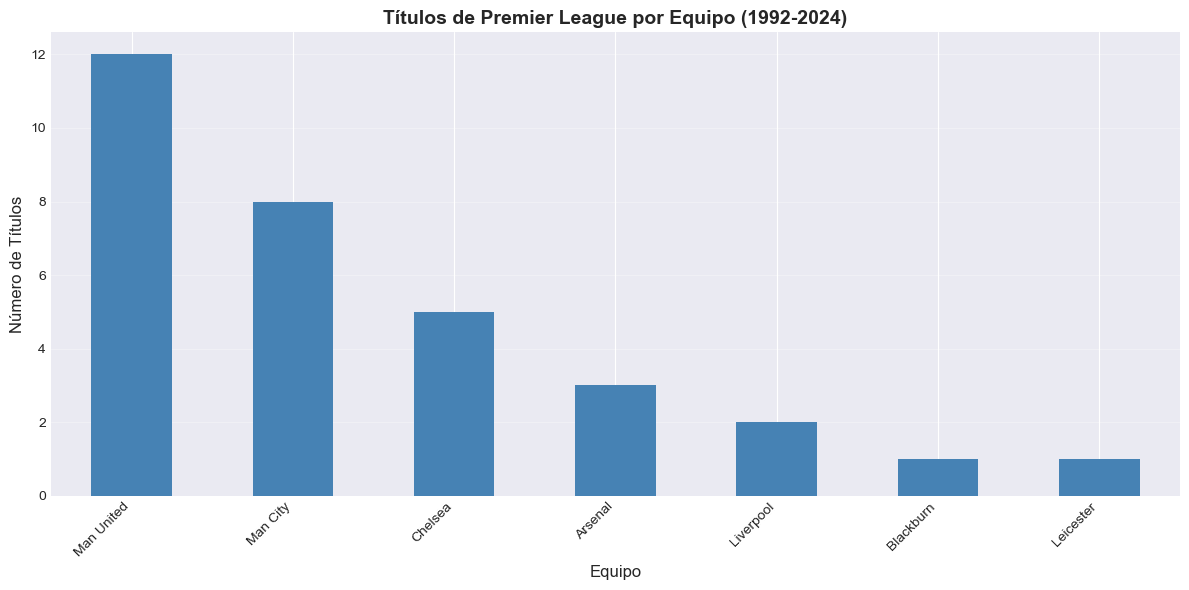

In [12]:
# Gráfico: Títulos por equipo
plt.figure(figsize=(12, 6))
titulos.plot(kind='bar', color='steelblue')
plt.title('Títulos de Premier League por Equipo (1992-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Equipo', fontsize=12)
plt.ylabel('Número de Títulos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

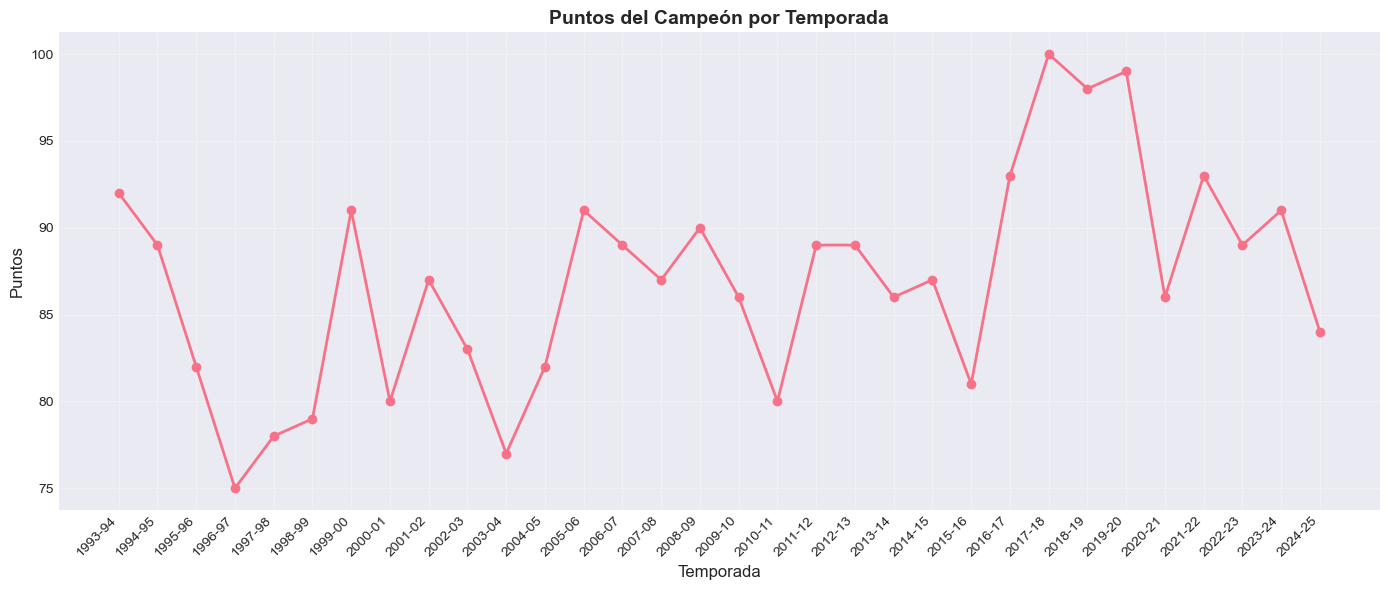

In [13]:
# Gráfico: Puntos del campeón por temporada
plt.figure(figsize=(14, 6))
plt.plot(campeones['Temporada'], campeones['Pts'], marker='o', linewidth=2, markersize=6)
plt.title('Puntos del Campeón por Temporada', fontsize=14, fontweight='bold')
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Puntos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Funciones de consulta

In [14]:
def ver_historial_equipo(equipo_nombre):
    """Muestra el historial completo de un equipo"""
    
    # Buscar equipos que coincidan
    equipos_disponibles = df['Equipo'].unique()
    coincidencias = [e for e in equipos_disponibles if equipo_nombre.lower() in e.lower()]
    
    if not coincidencias:
        print(f"No se encontró ningún equipo con '{equipo_nombre}'")
        return
    
    if len(coincidencias) > 1:
        print(f"Se encontraron {len(coincidencias)} equipos:")
        for e in coincidencias:
            print(f"  - {e}")
        print("\nPor favor, especifica mejor el nombre del equipo")
        return
    
    equipo = coincidencias[0]
    historial = df[df['Equipo'] == equipo].sort_values('Temporada')
    
    print(f"\n{'='*70}")
    print(f"HISTORIAL: {equipo}")
    print(f"{'='*70}")
    print(f"Temporadas jugadas: {len(historial)}")
    print(f"Mejor posición: {historial['Pos'].min()}° (Temporada {historial[historial['Pos'] == historial['Pos'].min()]['Temporada'].values[0]})")
    print(f"Peor posición: {historial['Pos'].max()}° (Temporada {historial[historial['Pos'] == historial['Pos'].max()]['Temporada'].values[0]})")
    print(f"Promedio de posición: {historial['Pos'].mean():.1f}°")
    print(f"\nHistorial completo:")
    print(historial[['Temporada', 'Pos', 'PJ', 'G', 'E', 'P', 'Pts', 'GF', 'GC']].to_string(index=False))
    
    return historial

# Ejemplo de uso
# ver_historial_equipo('Arsenal')

In [15]:
def ver_temporada(temporada):
    """Muestra la clasificación completa de una temporada"""
    
    temp_data = df[df['Temporada'] == temporada].sort_values('Pos')
    
    if len(temp_data) == 0:
        print(f"No se encontraron datos para la temporada {temporada}")
        return
    
    print(f"\n{'='*70}")
    print(f"PREMIER LEAGUE - TEMPORADA {temporada}")
    print(f"{'='*70}")
    print(temp_data[['Pos', 'Equipo', 'PJ', 'G', 'E', 'P', 'Pts', 'GF', 'GC', 'Dif']].to_string(index=False))
    
    return temp_data

# Ejemplo de uso
# ver_temporada('2015-16')  # Temporada del Leicester

In [16]:
def comparar_equipos(*equipos):
    """Compara el historial de múltiples equipos"""
    
    comparacion = []
    
    for equipo_nombre in equipos:
        coincidencias = [e for e in df['Equipo'].unique() if equipo_nombre.lower() in e.lower()]
        
        if len(coincidencias) == 1:
            equipo = coincidencias[0]
            historial = df[df['Equipo'] == equipo]
            
            comparacion.append({
                'Equipo': equipo,
                'Temporadas': len(historial),
                'Títulos': len(historial[historial['Pos'] == 1]),
                'Top 4': len(historial[historial['Pos'] <= 4]),
                'Mejor Pos': historial['Pos'].min(),
                'Peor Pos': historial['Pos'].max(),
                'Promedio Pos': historial['Pos'].mean(),
                'Total Pts': historial['Pts'].sum(),
                'Promedio Pts': historial['Pts'].mean()
            })
    
    comp_df = pd.DataFrame(comparacion)
    print("\nComparación de equipos:")
    print(comp_df.to_string(index=False))
    
    return comp_df

# Ejemplo de uso
# comparar_equipos('Manchester United', 'Arsenal', 'Chelsea', 'Liverpool')

## 9. Análisis específicos

In [17]:
# Top 10 mejores temporadas por puntos
print("Top 10 mejores temporadas por puntos:")
mejores_temporadas = df.nlargest(10, 'Pts')[['Temporada', 'Equipo', 'Pos', 'Pts', 'GF', 'GC']]
print(mejores_temporadas.to_string(index=False))

Top 10 mejores temporadas por puntos:
Temporada     Equipo  Pos  Pts  GF  GC
  2017-18   Man City    1  100 106  27
  2019-20  Liverpool    1   99  85  33
  2018-19   Man City    1   98  95  23
  2018-19  Liverpool    2   97  89  22
  2016-17    Chelsea    1   93  85  33
  2021-22   Man City    1   93  99  26
  1993-94 Man United    1   92  80  38
  2021-22  Liverpool    2   92  94  26
  1999-00 Man United    1   91  97  45
  2005-06    Chelsea    1   91  72  22


In [19]:
# Equipos descendidos por temporada (posiciones 18-22)
descendidos = df[df['Pos'] >= 18].sort_values(['Temporada', 'Pos'])
print(f"\nTotal de equipos descendidos: {len(descendidos)}")
print("\nDescensos por temporada:")
print(descendidos[['Temporada', 'Pos', 'Equipo', 'Pts']].to_string(index=False))


Total de equipos descendidos: 100

Descensos por temporada:
Temporada  Pos           Equipo  Pts
  1993-94   18      Southampton   43
  1993-94   19          Ipswich   43
  1993-94   20 Sheffield United   42
  1993-94   21           Oldham   40
  1993-94   22          Swindon   30
  1994-95   18      Aston Villa   48
  1994-95   19   Crystal Palace   45
  1994-95   20          Norwich   43
  1994-95   21        Leicester   29
  1994-95   22          Ipswich   27
  1995-96   18         Man City   38
  1995-96   19              QPR   33
  1995-96   20           Bolton   29
  1996-97   18         Coventry   41
  1996-97   19       Sunderland   40
  1996-97   20    Nott'm Forest   34
  1997-98   18           Bolton   40
  1997-98   19         Barnsley   35
  1997-98   20   Crystal Palace   33
  1998-99   18         Charlton   36
  1998-99   19        Blackburn   35
  1998-99   20    Nott'm Forest   30
  1999-00   18        Wimbledon   33
  1999-00   19   Sheffield Weds   31
  1999-00   20

In [20]:
# Análisis de goles
print("Top 10 equipos con más goles en una temporada:")
mas_goles = df.nlargest(10, 'GF')[['Temporada', 'Equipo', 'GF', 'Pos']]
print(mas_goles.to_string(index=False))

Top 10 equipos con más goles en una temporada:
Temporada     Equipo  GF  Pos
  2017-18   Man City 106    1
  2009-10    Chelsea 103    1
  2013-14   Man City 102    1
  2019-20   Man City 102    2
  2013-14  Liverpool 101    2
  2021-22   Man City  99    1
  1999-00 Man United  97    1
  2023-24   Man City  96    1
  2018-19   Man City  95    1
  2021-22  Liverpool  94    2


## 10. Exportar resúmenes

In [21]:
# Crear resumen ejecutivo
resumen = {
    'Total_Temporadas': df['Temporada'].nunique(),
    'Total_Equipos_Unicos': df['Equipo'].nunique(),
    'Total_Partidos': df['PJ'].sum(),
    'Total_Goles': df['GF'].sum(),
    'Equipos_Siempre_Premier': len(siempre_premier),
    'Campeones_Diferentes': campeones['Equipo'].nunique()
}

print("\nRESUMEN EJECUTIVO - PREMIER LEAGUE")
print("="*50)
for key, value in resumen.items():
    print(f"{key.replace('_', ' ')}: {value:,}")

# Guardar resumen
pd.DataFrame([resumen]).to_csv('resumen_premier_league.csv', index=False)
print("\n✓ Resumen guardado en 'resumen_premier_league.csv'")


RESUMEN EJECUTIVO - PREMIER LEAGUE
Total Temporadas: 32
Total Equipos Unicos: 51
Total Partidos: 24,468
Total Goles: 32,958
Equipos Siempre Premier: 6
Campeones Diferentes: 7

✓ Resumen guardado en 'resumen_premier_league.csv'


## 11. Consultas personalizadas

In [22]:
# Aquí puedes hacer tus propias consultas
# Ejemplo: Ver historial del Manchester United
# ver_historial_equipo('Manchester United')

In [23]:
# Ejemplo: Ver la temporada 2015-16 (Leicester campeón)
# ver_temporada('2015-16')

In [24]:
# Ejemplo: Comparar los 'Big 6'
# comparar_equipos('Manchester United', 'Manchester City', 'Liverpool', 'Arsenal', 'Chelsea', 'Tottenham')